In [1]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip = zipfile.ZipFile("/content/drive/MyDrive/VRSREC Lessons 2024/Project 4 UnSupervised ML/c_0000.csv.zip", 'r')
zip.extractall("/tmp")
zip.close()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
csv_file = "/tmp/c_0000.csv"
df = pd.read_csv(csv_file)
df.head()

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5


In [6]:
df.shape

(64000, 8)

In [7]:
np.shape(df)

(64000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       64000 non-null  float64
 1   y       64000 non-null  float64
 2   z       64000 non-null  float64
 3   vx      64000 non-null  float64
 4   vy      64000 non-null  float64
 5   vz      64000 non-null  float64
 6   m       64000 non-null  float64
 7   id      64000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 3.9 MB


In [9]:
df.describe()

,x,y,z,vx,vy,vz,m,id
count,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,64000.000000
mean,-1.176595e-10,3.412734e-10,2.464757e-10,1.101956e-10,2.103394e-10,1.820625e-11,1.562500e-05,32000.500000
std,7.807475e-01,7.814718e-01,7.719907e-01,4.088337e-01,4.078873e-01,4.080323e-01,6.776317e-21,18475.352951
min,-4.698981e+00,-5.095714e+00,-5.015129e+00,-1.619203e+00,-1.482613e+00,-1.685246e+00,1.562500e-05,1.000000
25%,-3.348222e-01,-3.366134e-01,-3.356278e-01,-2.697400e-01,-2.714544e-01,-2.709821e-01,1.562500e-05,16000.750000
50%,-4.818202e-04,-4.321573e-04,-3.949339e-03,-2.090700e-04,1.419134e-03,1.770830e-04,1.562500e-05,32000.500000
75%,3.347058e-01,3.321014e-01,3.305091e-01,2.691137e-01,2.707544e-01,2.700553e-01,1.562500e-05,48000.250000
max,5.401047e+00,5.680950e+00,4.762590e+00,1.547319e+00,1.584202e+00,1.600681e+00,1.562500e-05,64000.000000


In [11]:
df.isnull().sum()

,0
x,0
y,0
z,0
vx,0
vy,0
vz,0
m,0
id,0


In [12]:
df.drop('id', axis=1, inplace=True)
df

,x,y,z,vx,vy,vz,m
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016
...,...,...,...,...,...,...,...
63995,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357,0.000016
63996,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824,0.000016
63997,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062,0.000016
63998,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334,0.000016


In [13]:
df.corr()

,x,y,z,vx,vy,vz,m
x,1.000000,-0.009828,-0.007356,-0.000685,0.002610,0.002841,NaN
y,-0.009828,1.000000,0.008312,0.002121,-0.000949,-0.001371,NaN
z,-0.007356,0.008312,1.000000,0.000691,0.000124,0.002060,NaN
vx,-0.000685,0.002121,0.000691,1.000000,0.002104,0.006369,NaN
vy,0.002610,-0.000949,0.000124,0.002104,1.000000,0.002951,NaN
vz,0.002841,-0.001371,0.002060,0.006369,0.002951,1.000000,NaN
m,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

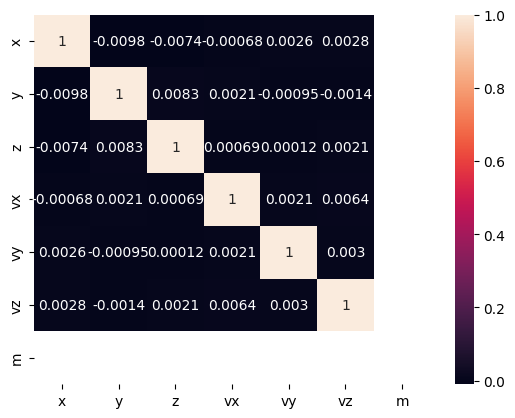

In [14]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

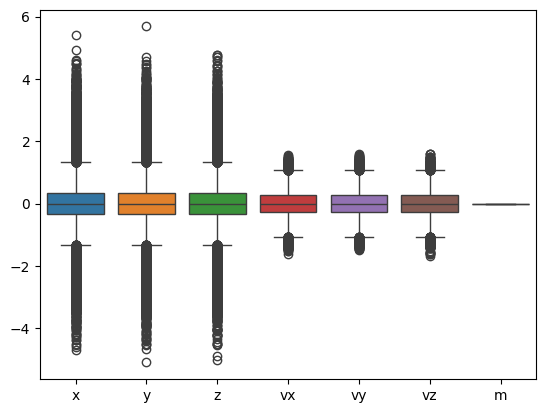

In [15]:
sns.boxplot(df)

In [ ]:
# To find outliers

# z_scores = np.abs((df - df.mean()) / df.std())
# threshold = 3
# df_outliers = df[(z_scores > threshold).all(axis=1)]
# print(df_outliers)

In [16]:
# Dealing with outliners

z_scores = np.abs((df - df.mean()) / df.std())
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]
df_no_outliers

,x,y,z,vx,vy,vz,m
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016
...,...,...,...,...,...,...,...
63995,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357,0.000016
63996,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824,0.000016
63997,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062,0.000016
63998,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334,0.000016


<Axes: >

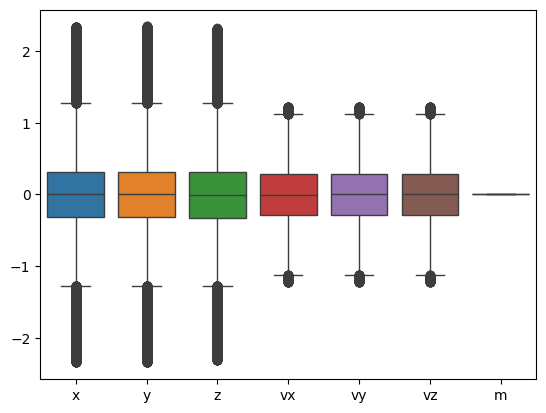

In [19]:
sns.boxplot(df_no_outliers)

In [20]:
df_no_outliers.shape

(60295, 7)

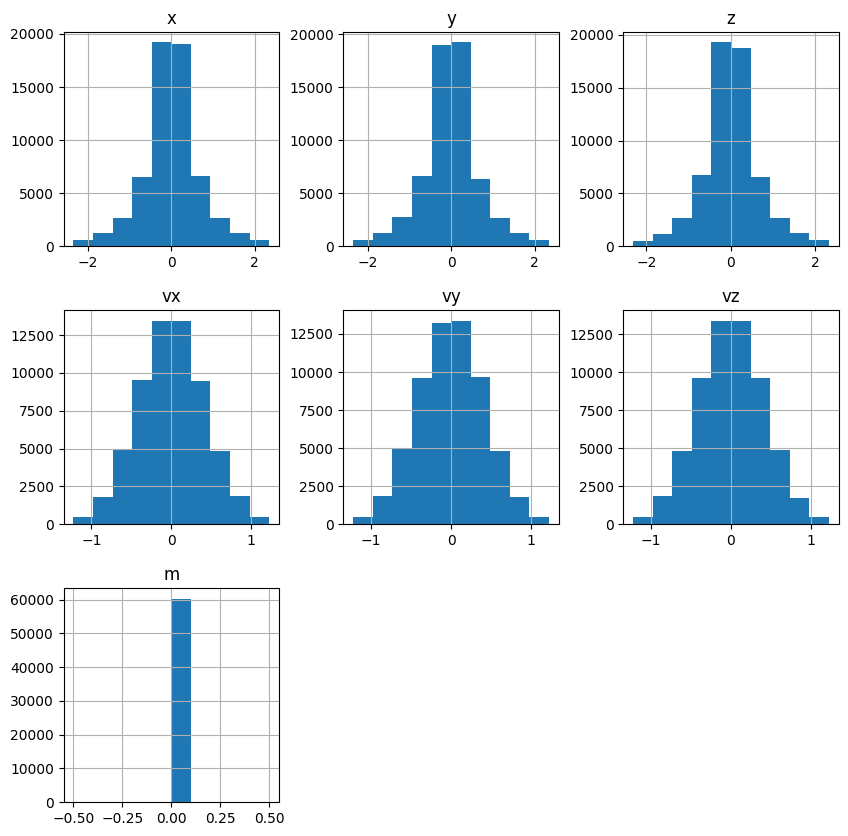

In [21]:
df_no_outliers.hist(figsize=(10, 10))
plt.show()

In [22]:
from sklearn.cluster import KMeans

In [23]:
KMC = KMeans(n_clusters=2)
KMC

KMeans(n_clusters=2)

In [24]:
KMC.fit(df_no_outliers)

KMeans(n_clusters=2)

In [27]:
cluster_range = list(range(1,20))
inertia = []


for i in cluster_range:
  KMC = KMeans(n_clusters=i)
  KMC.fit(df_no_outliers)
  inertia.append(KMC.inertia_)

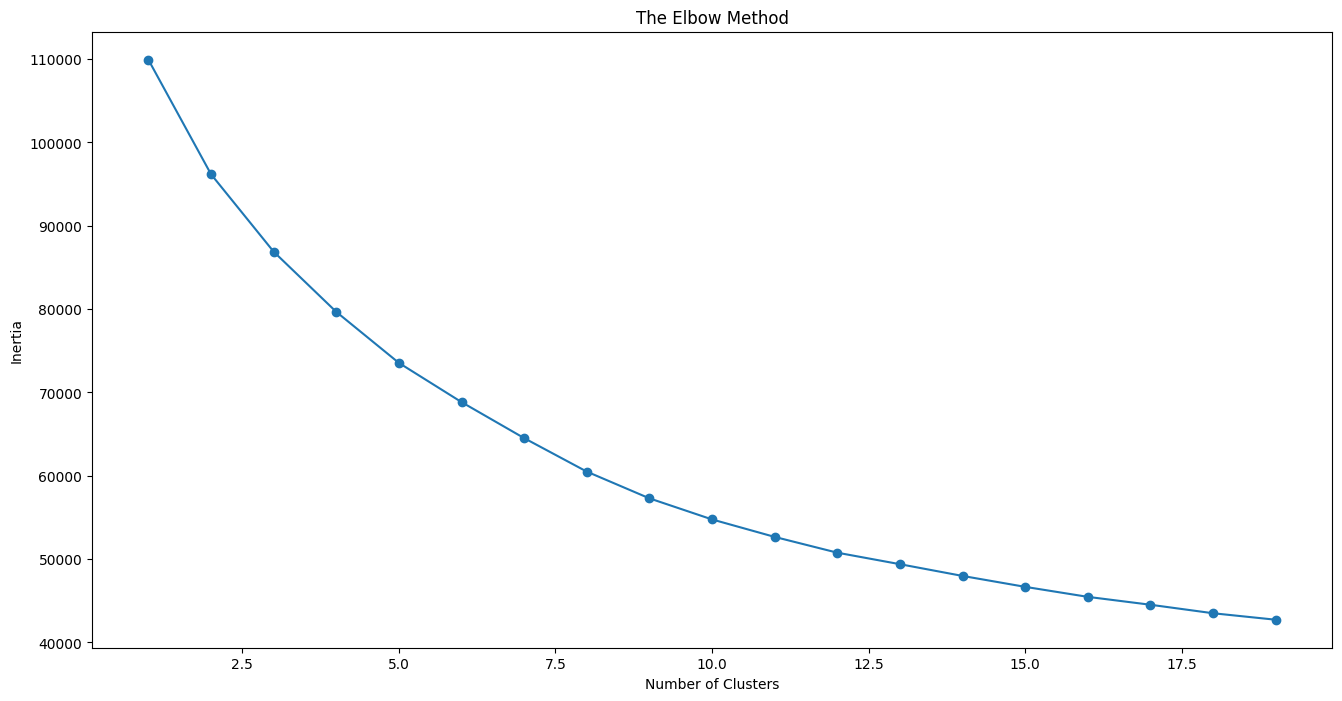

In [28]:
plt.figure(figsize=(16,8))
plt.plot(cluster_range, inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [29]:
!pip install yellowbrick

In [30]:
from yellowbrick.cluster import KElbowVisualizer

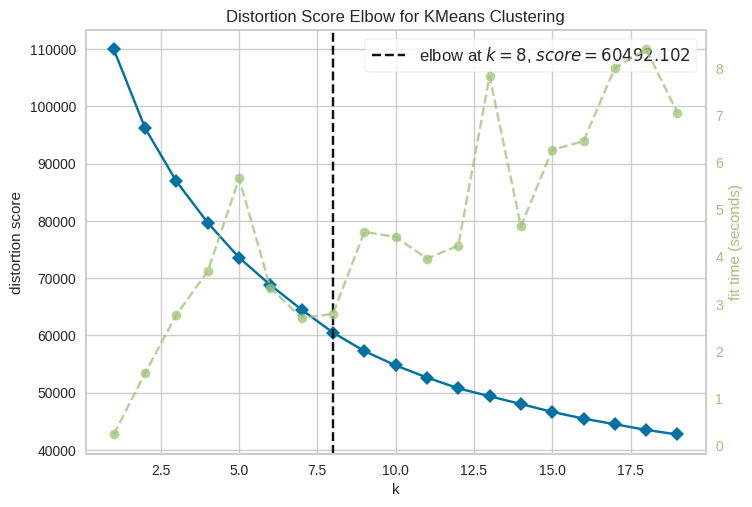

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
KMC = KMeans()
visualizer = KElbowVisualizer(KMC, k=(1,20))
visualizer.fit(df_no_outliers)
visualizer.show()

In [33]:
# KMeans?

In [35]:
KMC = KMeans(n_clusters=8, init='k-means++', random_state=42)
KMC.fit(df_no_outliers)

KMeans(random_state=42)

In [44]:
labels = KMC.labels_
labels

array([0, 5, 6, ..., 5, 2, 1], dtype=int32)

In [48]:
# df_no_outliers['cluster'] = labels
# df_no_outliers

,x,y,z,vx,vy,vz,m,cluster
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,0
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,5
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,6
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5
...,...,...,...,...,...,...,...,...
63995,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357,0.000016,2
63996,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824,0.000016,3
63997,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062,0.000016,5
63998,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334,0.000016,2


In [49]:
centers = KMC.cluster_centers_
centers

array([[ 5.40345468e-01, -7.56031982e-01, -8.16587592e-01,
        -4.08831269e-03, -6.79281785e-03, -1.15574049e-02,
         1.56250010e-05],
       [-9.08039963e-01, -8.32254227e-01,  1.65118158e-01,
        -1.02139855e-02, -7.36451002e-03,  1.02801776e-02,
         1.56250010e-05],
       [-4.89200913e-01,  7.58758769e-01,  8.43846082e-01,
         1.10865455e-03,  5.88269156e-03, -3.84121189e-03,
         1.56250010e-05],
       [ 6.87252008e-01, -5.73865428e-01,  8.85329733e-01,
        -3.21960588e-03, -4.17181863e-03,  8.42529377e-03,
         1.56250010e-05],
       [ 8.86595115e-01,  8.46852435e-01, -2.09289528e-01,
        -1.18685626e-02, -5.35374112e-03, -5.11934901e-03,
         1.56250010e-05],
       [ 8.67456443e-03, -3.84525778e-03, -5.85229677e-03,
        -4.65193642e-02,  3.89398157e-01, -1.29306121e-02,
         1.56250010e-05],
       [-3.73873254e-03,  2.61247831e-04,  2.12557581e-03,
         5.57697405e-02, -4.01624431e-01,  9.91020828e-03,
         1.5625001

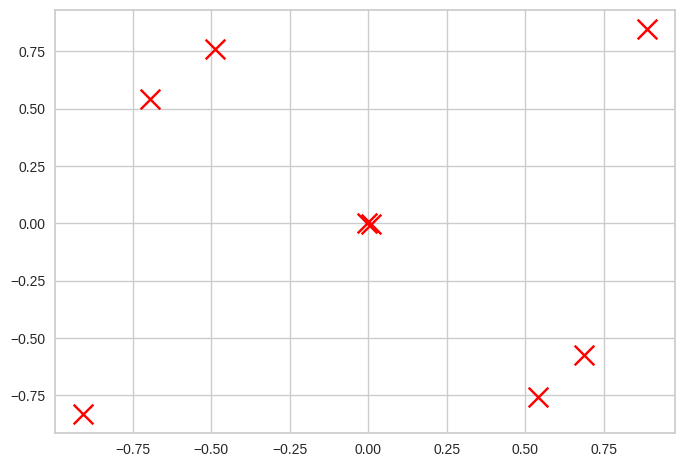

In [50]:
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', s=200)

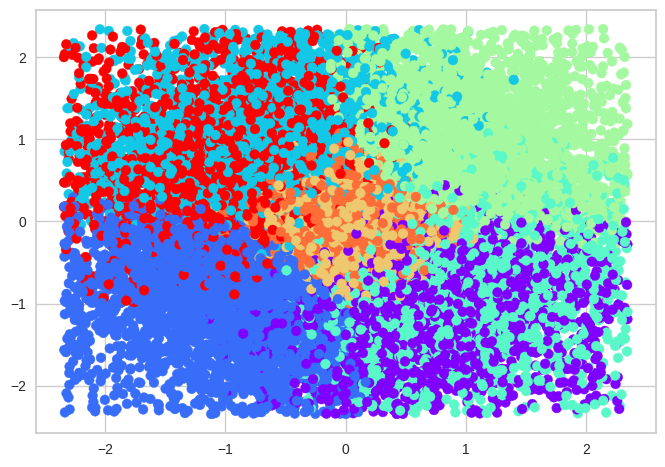

In [51]:
plt.scatter(df_no_outliers.iloc[:,0], df_no_outliers.iloc[:,1], c=labels, cmap='rainbow')

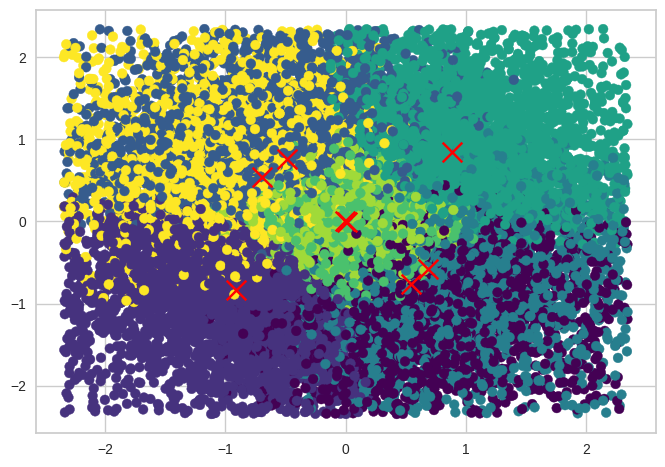

In [55]:
plt.scatter(df_no_outliers.iloc[:,0], df_no_outliers.iloc[:,1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', s=200)
plt.show()

In [56]:
df_no_outliers.shape

(60295, 8)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [58]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers)

In [59]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [60]:
optimal_clusters = 8
KMC = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
KMC.fit(pca_data)

KMeans(random_state=42)

In [61]:
labels= KMC.fit_predict(pca_data)
centers = KMC.cluster_centers_

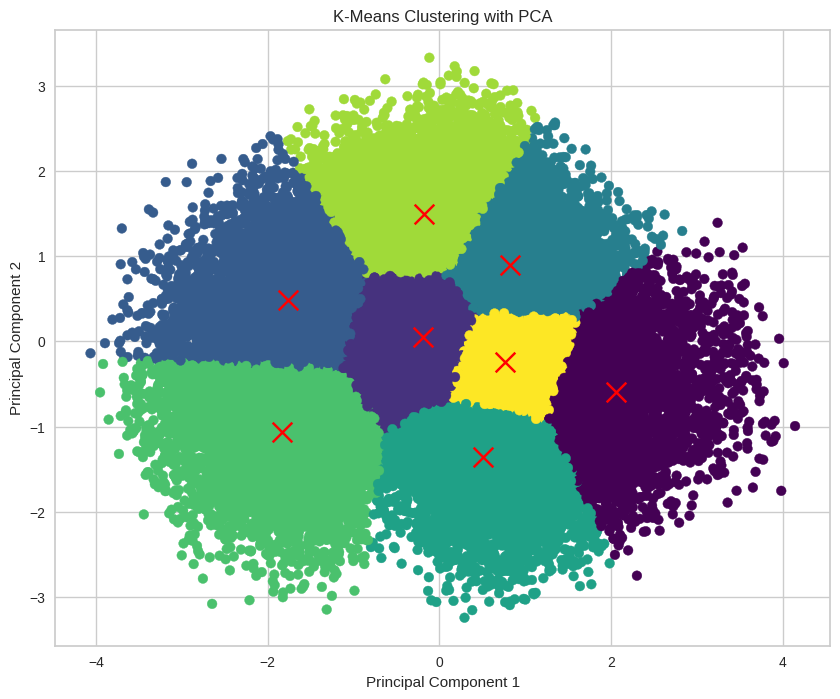

In [62]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', s=200)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()